In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


from util import COMMENTS_PATH, count_tokens
from vectorize_comments import load_embeddings

In [58]:
text_color = '#eaeaea'
background_color = '#151515'
plt.rcParams.update({
    'font.size': 20,
    "axes.grid": True,
    'savefig.facecolor': background_color,
    'axes.facecolor': background_color,
    'figure.facecolor': background_color,
    "ytick.color": text_color,
    "xtick.color": text_color,
    "axes.labelcolor": text_color,
    "axes.edgecolor": text_color,
    "axes.titlecolor": text_color,
    'patch.edgecolor': 'none',
    'legend.labelcolor': text_color,
    'grid.color': text_color,
    'grid.alpha': 0.3,
    'savefig.bbox': 'tight',
    'savefig.dpi': 400,
})

In [2]:
comments: pd.DataFrame = pd.read_csv(COMMENTS_PATH).set_index('id').sort_index()
comments.head(10)

,post_id,title,canonical_url,name,user_id,date,likes,depth,total_children,parent_id,parent_children,thread_id,thread_children,ratio_recv,ratio_give,body
id,,,,,,,,,,,,,,,,
3305267,42751863,Dave Chappelle and the still-doomed politics o...,https://www.slowboring.com/p/dave-chappelle-an...,Matt Hagy,3094604,2021-10-20 13:28:43-04:00,8,1,3,3301076.0,18.0,3301076,18,-6.0,-3.0,Netflix is in a unique position in that their ...
3487721,43514326,Thoughts on the Virginia election,https://noahpinion.substack.com/p/thoughts-on-...,Matt Hagy,3094604,2021-11-04 07:40:50-04:00,1,1,1,3485207.0,3.0,3485207,3,NaN,-12.0,I worry that this approach would lead to furth...
3592608,43776715,European countries have really high taxes,https://www.slowboring.com/p/european-countrie...,Matt Hagy,3094604,2021-11-12 07:32:50-05:00,14,1,6,3592377.0,16.0,3592377,16,-13.0,2.0,It's not just the highest tax bracket that mat...
3644093,43937960,Time to declare victory on stimulating the eco...,https://www.slowboring.com/p/time-to-declare-v...,Matt Hagy,3094604,2021-11-16 15:24:19-05:00,0,1,2,3642299.0,5.0,3642299,5,0.0,-3.0,"Yep. Further, investors are generally rotating..."
3901854,44832459,What is the goal of child care policy?,https://www.slowboring.com/p/what-is-the-goal-...,Matt Hagy,3094604,2021-12-07 05:28:18-05:00,0,3,1,3897692.0,4.0,3891603,6,NaN,-2.0,The Center for American Progress has a 2018 ar...
3915524,45150536,Techno-optimism for 2022,https://noahpinion.substack.com/p/techno-optim...,Matt Hagy,3094604,2021-12-08 05:27:41-05:00,2,0,1,NaN,NaN,3915524,1,NaN,NaN,On the front of ever more costly drug discover...
3949338,45073472,A boring post about how monetary policy works,https://www.slowboring.com/p/monetary-mechanism,Matt Hagy,3094604,2021-12-10 07:46:10-05:00,2,0,1,NaN,NaN,3949338,1,NaN,NaN,Great high-level explanation of central bankin...
3983530,45381030,Four reasons Biden's spending bill won't make ...,https://noahpinion.substack.com/p/four-reasons...,Matt Hagy,3094604,2021-12-12 20:16:48-05:00,1,0,3,NaN,NaN,3983530,3,2.0,NaN,The CBO analysis that anticipates a $200 billi...
3986762,45221732,California’s math detracking initiative seems ...,https://www.slowboring.com/p/californias-math-...,Matt Hagy,3094604,2021-12-13 06:40:20-05:00,18,0,15,NaN,NaN,3986762,15,-9.0,NaN,I think there’s a large risk that the backlash...


In [3]:
comments.iloc[0]

post_id                                                     42751863
title              Dave Chappelle and the still-doomed politics o...
canonical_url      https://www.slowboring.com/p/dave-chappelle-an...
name                                                       Matt Hagy
user_id                                                      3094604
date                                       2021-10-20 13:28:43-04:00
likes                                                              8
depth                                                              1
total_children                                                     3
parent_id                                                  3301076.0
parent_children                                                 18.0
thread_id                                                    3301076
thread_children                                                   18
ratio_recv                                                      -6.0
ratio_give                        

In [4]:
comments['body'].map(count_tokens).describe(percentiles=[.1, .25, .5, .75, .9]).round().to_frame().T

,count,mean,std,min,10%,25%,50%,75%,90%,max
body,610.0,249.0,159.0,2.0,63.0,124.0,227.0,346.0,466.0,904.0


In [5]:
embeddings = load_embeddings()
embeddings.head(5)

6736898     [-0.009460756, -0.021303149, -0.014724041, -0....
11271172    [-0.02271131, -0.0057564136, 0.008068147, -0.0...
4755461     [-0.0047251037, -0.0032476478, -0.017660592, 0...
10927110    [-0.044939827, -0.014524228, 0.027613629, -0.0...
8646664     [0.0035822953, -0.013142991, 0.005625932, -0.0...
Name: embedding, dtype: object

In [6]:
embeddings.iloc[0]

array([-0.00946076, -0.02130315, -0.01472404, ...,  0.0090068 ,
       -0.00430274, -0.00220729], dtype=float32)

In [7]:
type(embeddings)

pandas.core.series.Series

In [8]:
stacked_embeddings = np.vstack(embeddings.values)
stacked_embeddings.shape

(506, 1536)

In [9]:
pair_dot = np.matmul(stacked_embeddings, stacked_embeddings.T)
pair_dot.shape

(506, 506)

In [12]:
pair_dot_triag = pair_dot[np.triu_indices_from(pair_dot, k=1)]
pair_dot_triag.shape

(127765,)

In [16]:
(pd.Series(pair_dot_triag)
 .describe(percentiles=[.1, .25, .5, .75, .9])
 .round(2)
 .to_frame()
 .T)

,count,mean,std,min,10%,25%,50%,75%,90%,max
0,127765.0,0.74,0.03,0.62,0.7,0.72,0.74,0.76,0.79,1.0


In [36]:
pd.Series(np.where((pair_dot > .9) & (pair_dot < .97))[0]).value_counts().head(10)

471    6
199    5
416    5
418    5
43     4
211    3
348    3
411    3
51     3
126    3
Name: count, dtype: int64

In [43]:
print(comments.loc[embeddings.index[126]]['body'])

While a windfall-tax-funded subsidy may spur domestic investment in oil and gas production in the short term, I think this approach will only weaken medium and long term investment due to the punitive messaging around the windfall tax. I.e., we’re further doubling down on “signal[ing] a desire to deter investment in U.S. oil and gas production.”

And I think Republicans will continue to attack us on this front. They will keep highlighting our general hostility to our domestic fossil fuel industry and explain that as the reason that no one wants to invest money into new domestic oil and gas projects. With gasoline prices on voters' minds, I think that will be devastatingly effective in electing Republicans.

Building off yesterday's post, “The case against restricting domestic fossil fuel supply”, I think we Democrats need to recognize that an adversarial stance towards the domestic oil and gas industry is a poor approach to addressing climate change. While we should remain committed to

In [52]:
pd.Series(pair_dot[126]).sort_values(ascending=True).head(10)

365    0.664157
201    0.674544
15     0.675514
481    0.675655
361    0.676662
397    0.678713
157    0.681601
314    0.683947
311    0.684082
190    0.687775
dtype: float32

In [48]:
(pd.Series(pair_dot[126])
 .describe(percentiles=[.1, .25, .5, .75, .9]))


count    506.000000
mean       0.761318
std        0.038367
min        0.664157
10%        0.715507
25%        0.737257
50%        0.759749
75%        0.783767
90%        0.805193
max        1.000000
dtype: float64

Text(0.5, 0, 'Embedding Similarity (Dot Product)')

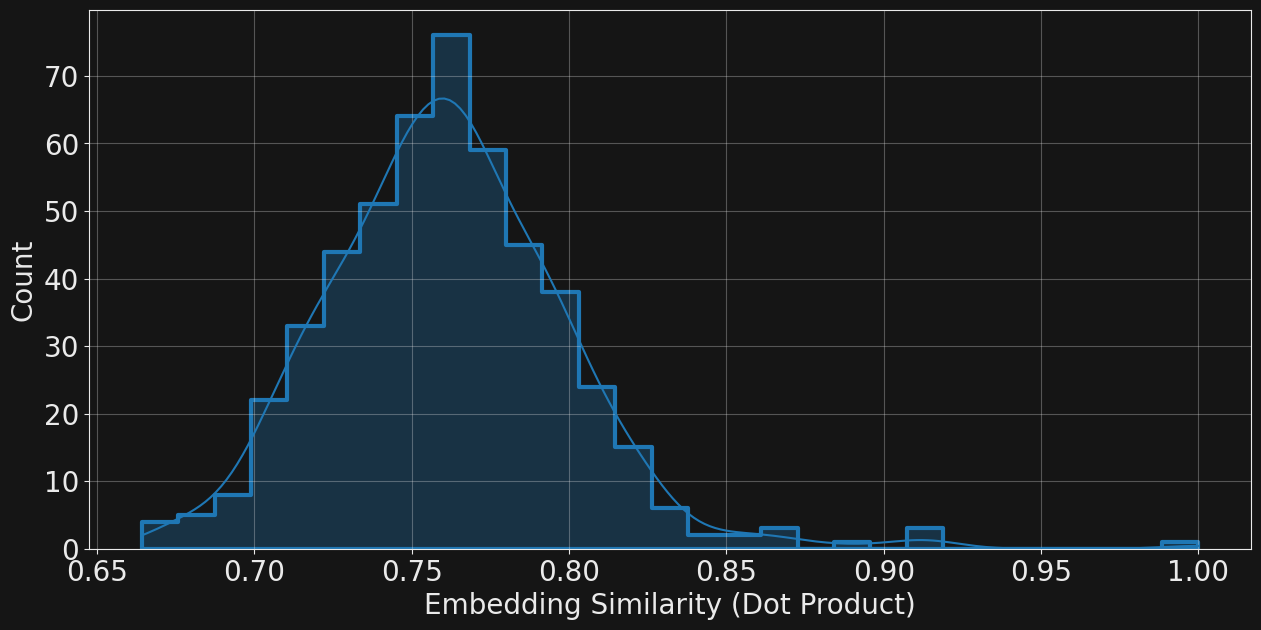

In [51]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(pair_dot[126],
             element='step', alpha=0.3, linewidth=3, kde=True,
             ax=ax)
plt.xlabel('Embedding Similarity (Dot Product)')

In [53]:
print(comments.loc[embeddings.index[365]]['body'])


I found the following on a quick Bing Chat with “Does the Google internship application process include an online coding test?”

https://careers.google.com/how-we-hire/

> While the process may differ slightly for different roles or teams, the same basics apply whether you’re applying for a tech job or a marketing job, an internship or a leadership position. Not all of these may apply for your role, but here are some of the ways we assess candidates in our hiring process:
> Assessments: You may be asked to do a brief online assessment, like a coding quiz, after you’ve submitted your resume.

https://www.geeksforgeeks.org/google-online-challenge-for-summer-internship-2021/

> Google Online Challenge for Summer Internship 2021
> The Google online challenge 2020 for summer internships 2021 was held on Sept 26. It was a 60-minute online test having 2 questions to code.



In [55]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(stacked_embeddings)

In [56]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
).astype(float)

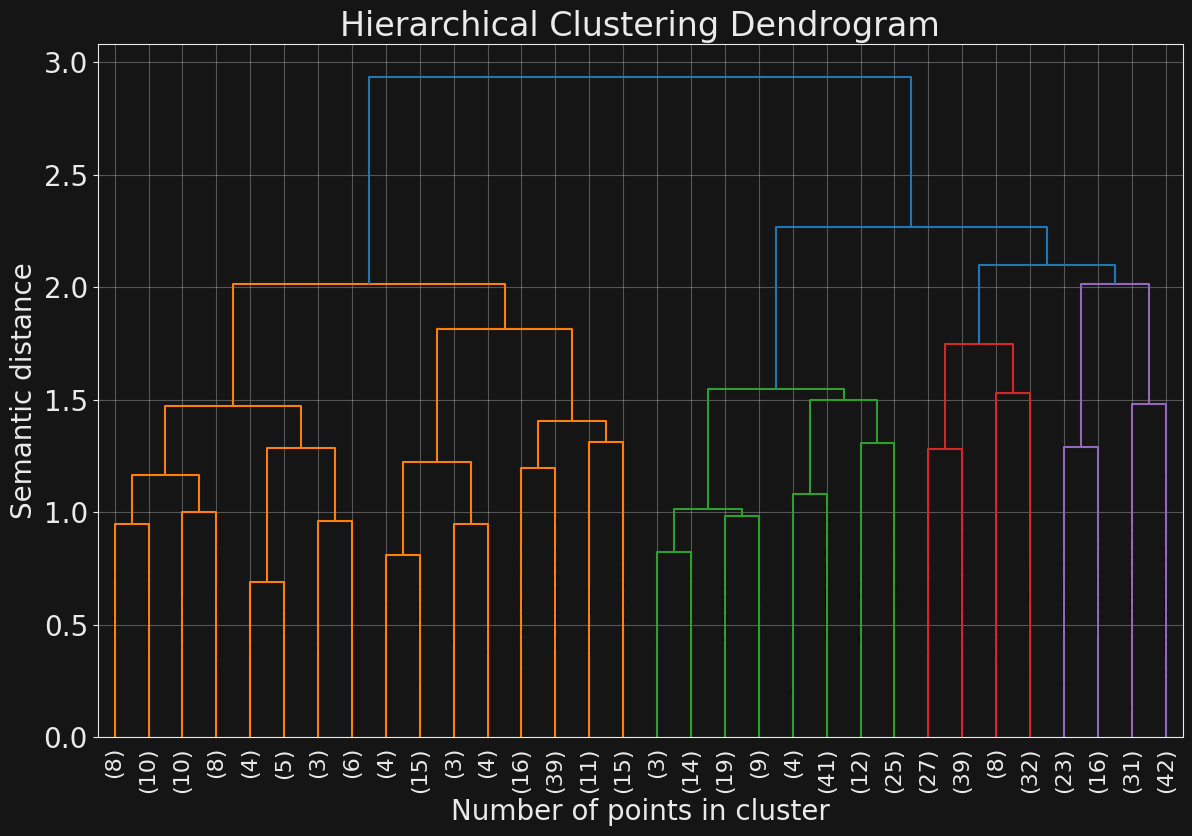

In [65]:
fig, ax = plt.subplots(figsize=(14, 9))
dendrogram(linkage_matrix, truncate_mode="level", p=4, ax=ax, leaf_rotation=90, leaf_font_size=16, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in cluster")
plt.ylabel('Semantic distance')
plt.show()